# K - Means Algorithm

## What is Clustering?


<kbd>CLUSTERING TASK</kbd> Group/Cluster similar data points.

<kbd>OBSERVATIONS</kbd> 
    Points in a cluster are close together.
    Points in different cluster are far away from each other.
    

Clustering is UNSUPERVISED LEARNING.

Algorithm(for clustering): K-means, K-means++, Hierarchical Clustering, DBSCAN
    
<img src="img/2.png">

## Applications of Clustering
    
* E-commerce - Task is to group similar customers based on there purchasing behavior. Customer behaviour can include: 
    - How much money they spent
    - Kind of credit card
    - Kind of products they buy
    - Geographical area
    
<img src="img/3.jpg">

* Image Segmentation - grouping of similar pixels
    - After grouping, we typically apply ML techniques to perform object detection.
    
<img src="img/4.jpg">
    

<b>K-MEANS CLUSTERING</b>
    - Group them into 'k' clusters.
    - For every clusters, it assigns centroid to each cluster.
   
<img src="img/1.png">
   
<img src="img/6.png">
    

## Coding Sample

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [4]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print(model.labels_)
print(model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5,1,'K Mean Classification')

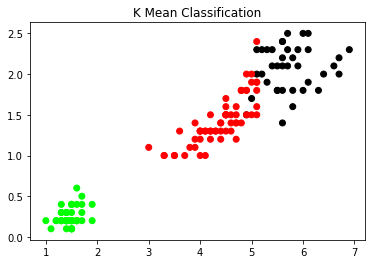

In [6]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_])
plt.title('K Mean Classification')

In [7]:
predict = model.predict(x)

In [8]:
Y = iris.target

In [9]:
from scipy.stats import mode
labels = np.zeros_like(predict)
for i in range(3):
    mask = (predict==i)
    labels[mask] = mode(Y[mask])[0]

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y, labels)

0.8933333333333333

In [11]:
confusion_matrix(Y, labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)